# Trabalho Final - Deep Learning and Reinforcement Learning

### Integrantes:

###    1) Jurandir Ventura - RM336634
###    2) Marcelo Preto - RM336632
###    3) Fabio Rizzi - RM336656
###    4) Thiago Alexandre – RM336583

## Redes Neurais Convolucionais

## Exercício #7 - 1 PONTO
### Utilizando o dataset Fashion MNIST, construa uma CNN para a classificação do dataset.
### Dicas:

* Utilize a LeNet-5 como exemplo bem como o exemplo visto em salada de aula do dataset mninst.
* Utilize o comando `(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()` para carregar o dataset.
* Os labels da classe são os seguintes:

| Label | Classe      |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

In [1]:
random_state=42

In [2]:
try:
    import tensorflow as tf
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import keras
    import keras.layers as layers
    from keras.utils import np_utils
except:
    !pip install tensorflow numpy matplotlib keras

# seeds
tf.random.set_seed(random_state)
np.random.seed(random_state)

# X = imagens, y = labels
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
print("Dimensão das imagens:",format(X_train[0].shape))
print("Quantidade de imagens de treino:",format(len(X_train)), "imagens")
print("Quantidade de imagens de teste:",format(len(X_test)), "imagens")
print("Labels:",format(class_names))

Dimensão das imagens: (28, 28)
Quantidade de imagens de treino: 60000 imagens
Quantidade de imagens de teste: 10000 imagens
Labels: ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Amostra de imagens do dataset

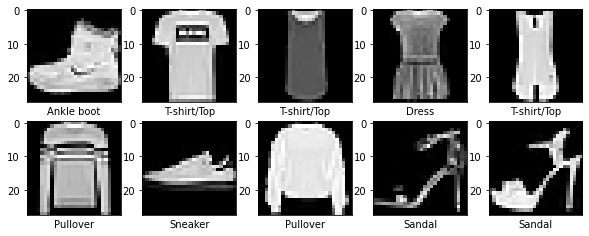

In [4]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'));
    plt.xlabel(class_names[y_train[i]])
plt.show();

 ### Ajusta a matriz para as dimensões esperadas do TensorFlow (4D)

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

### Normaliza as entradas RGB dividindo pelo valor máximo

In [6]:
X_train = X_train/255
X_test = X_test/255

### Gera os vetores com as classes do conjunto de dados de treinamento e teste para one-hot encoding


In [7]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


### Arquitetura LeNet-5:

![LeNet-5](data/lenet5.png)

- Convolution #1. Input = 32x32x1. Output = 28x28x6 conv2d

- SubSampling #1. Input = 28x28x6. Output = 14x14x6. SubSampling is simply Average Pooling so we use avg_pool

- Convolution #2. Input = 14x14x6. Output = 10x10x16 conv2d

- SubSampling #2. Input = 10x10x16. Output = 5x5x16 avg_pool

- Fully Connected #1. Input = 5x5x16. Output = 120

- Fully Connected #2. Input = 120. Output = 84

- Output 10

Fontes:
- https://engmrk.com/lenet-5-a-classic-cnn-architecture/
- https://medium.com/@mgazar/lenet-5-in-9-lines-of-code-using-keras-ac99294c8086


### Cada imagem do dataset possui dimensão 28x28 pixels.
### Será utilizada essa dimensão ao invés de 32x32.

In [8]:
# Cria o modelo LeNet-5
model = keras.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=10, activation = 'softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

### Treinamento do Modelo

In [9]:
#history = model.fit(X_train, y_train, validation_split = 0.2, epochs=10, batch_size=256)
history = model.fit(X_train,y_train, epochs=15, batch_size=500, validation_data=(X_test, y_test), verbose=1) 

Epoch 1/15
120/120 [==============================] - 4s 37ms/step - loss: 0.9588 - accuracy: 0.6830 - val_loss: 0.6667 - val_accuracy: 0.7428
Epoch 2/15
120/120 [==============================] - 4s 34ms/step - loss: 0.5897 - accuracy: 0.7780 - val_loss: 0.5623 - val_accuracy: 0.7924
Epoch 3/15
120/120 [==============================] - 4s 35ms/step - loss: 0.5222 - accuracy: 0.8052 - val_loss: 0.5284 - val_accuracy: 0.8058
Epoch 4/15
120/120 [==============================] - 4s 35ms/step - loss: 0.4825 - accuracy: 0.8216 - val_loss: 0.4921 - val_accuracy: 0.8212
Epoch 5/15
120/120 [==============================] - 4s 35ms/step - loss: 0.4520 - accuracy: 0.8357 - val_loss: 0.4708 - val_accuracy: 0.8261
Epoch 6/15
120/120 [==============================] - 4s 35ms/step - loss: 0.4349 - accuracy: 0.8420 - val_loss: 0.4550 - val_accuracy: 0.8365
Epoch 7/15
120/120 [==============================] - 4s 36ms/step - loss: 0.4169 - accuracy: 0.8483 - val_loss: 0.4339 - val_accuracy: 0.8443

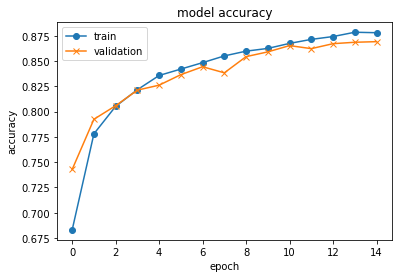

In [10]:
# Plotagem da acurácia de Treinamento e Validação
plt.figure(1)
plt.plot(history.history['accuracy'], 'o-')
plt.plot(history.history['val_accuracy'], 'x-')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Avaliação final do modelo no conjunto de testes

In [11]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Test loss {:.4f}, accuracy {:.2f}%".format(scores[0], scores[1] * 100)) 

Erro da CNN: 13.09%
Test loss 0.3683, accuracy 86.91%
